In [74]:
import pandas as pd
import numpy as np
import getpass
import datetime
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [52]:
pd.__version__

'1.4.2'

# Data Exploration (EDA)

In [53]:
data = pd.read_excel('/Users/civicfab/Desktop/Documents/Ironhack/Unit4/midproject/data_mid_bootcamp_project_regression/regression_data.xls')
data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [54]:
n = len(pd.unique(data['zipcode']))
n

70

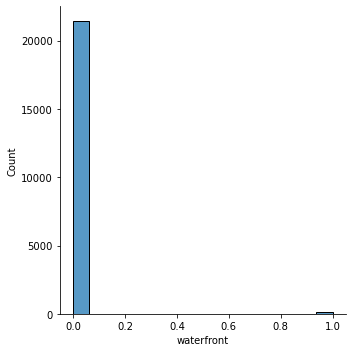

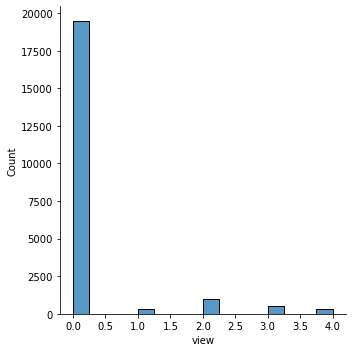

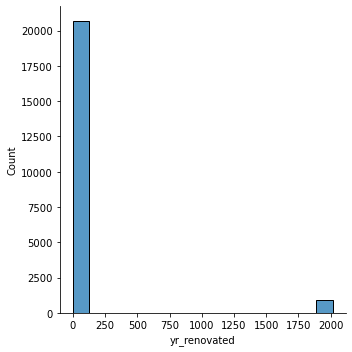

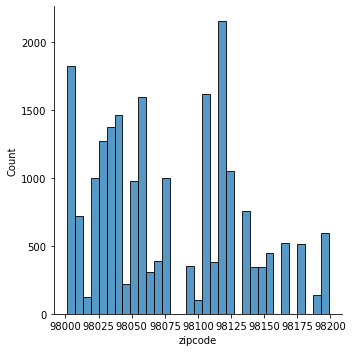

In [55]:
sns.displot(data, x="waterfront")
sns.displot(data, x="view")
sns.displot(data, x="yr_renovated")
sns.displot(data, x="zipcode")

<AxesSubplot:xlabel='waterfront', ylabel='price'>

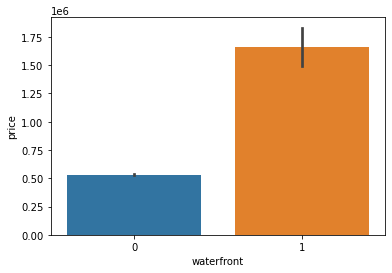

In [56]:
#On observe l'influence de la variable 'waterfront' sur le prix
sns.barplot(data=data, x="waterfront", y="price")

<AxesSubplot:xlabel='view', ylabel='price'>

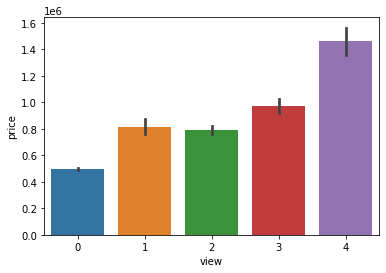

In [57]:
# On observe l'influence de la variable 'view' sur le prix
sns.barplot(data=data, x="view", y="price")

In [58]:
# checking for correlations
data_corr = data.corr()['price']*100
data_corr

id                -1.677185
bedrooms          30.878747
bathrooms         52.590562
sqft_living       70.191730
sqft_lot           8.987622
floors            25.680354
waterfront        26.639846
view              39.737030
condition          3.605638
grade             66.795077
sqft_above        60.536794
sqft_basement     32.379891
yr_built           5.395333
yr_renovated      12.642362
zipcode           -5.340243
lat               30.669231
long               2.203632
sqft_living15     58.524120
sqft_lot15         8.284493
price            100.000000
Name: price, dtype: float64

In [59]:
# On retire les colonnes qui ne sont pas utiles, pour certaines, on sait qu'elles ne sont pas utiles grace à l'analyse sur Tableau, par exemple on sait que waterfront ne contient qu'une valeur, elle ne peut pas être utile car elle n'aura pas de poid dans le modele qui a besoin de beaucoup de donner pour generaliser
usefull_data = data.drop(['id', 'yr_renovated', 'sqft_above', 'sqft_basement', 'condition', 'yr_built'], axis=1)

In [60]:
usefull_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   bedrooms       21597 non-null  int64         
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  int64         
 4   sqft_lot       21597 non-null  int64         
 5   floors         21597 non-null  float64       
 6   waterfront     21597 non-null  int64         
 7   view           21597 non-null  int64         
 8   grade          21597 non-null  int64         
 9   zipcode        21597 non-null  int64         
 10  lat            21597 non-null  float64       
 11  long           21597 non-null  float64       
 12  sqft_living15  21597 non-null  int64         
 13  sqft_lot15     21597 non-null  int64         
 14  price          21597 non-null  int64         
dtypes: datetime64[ns](1

In [61]:
#On vérifie s'il y'a des valeurs null, on observe que non
usefull_data.isnull().sum(axis = 0)

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
grade            0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [62]:
usefull_data.isna().sum(axis=0)

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
grade            0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

# Feature Engineering

In [63]:
# Le sqft living (et sqft lot final) sont determinant dans la prediction de la valeur du prix
# néanmoins, il faut prendre en compte la relation de causalité et non pas uniquement la corrélation
# donc, nous conservons parmis sqft_living et sqft_living15 la valeur de l'espace de vie au moment de la vente (date)
# ainsi, on utilise la valeur de l'espace qui était disponible dans la maison au moment de la vente
# on remarquera que la correlation du sqft_living sera moins forte que celle d'origine, mais plus juste en terme de causalité

def define_sqft(sqft15, sqft, date):
    return sqft15 if date <= datetime.datetime.strptime('2015-01-01', '%Y-%m-%d') else sqft

In [64]:
usefull_data['sqft_living_final'] = usefull_data.apply(lambda x: define_sqft(x.sqft_living15, x.sqft_living, x.date), axis=1)
usefull_data['sqft_lot_final'] = usefull_data.apply(lambda x: define_sqft(x.sqft_lot15, x.sqft_lot, x.date), axis=1)

In [65]:
usefull_data = usefull_data.drop(['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'date', 'long', 'sqft_lot_final'], axis=1)

In [66]:
# Fonction qui permet de transformer la valeur x en son log (on applique la fonction log à x) si le nombre est fini et différent de 0
def log_transform(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

In [67]:
# On applique le logarithme à la variable price afin de réduire les ordres de grandeurs entre les valeurs et rendre la variable plus simple à prédire
usefull_data['price'] = usefull_data['price'].apply(log_transform)

In [68]:
from sklearn.preprocessing import OneHotEncoder

# On sépare le zipcode des autres variables explicatives
X_cat = pd.DataFrame(usefull_data, columns = ['zipcode']) # ici on ne conserve que zipcode
X_least = usefull_data.drop(['price','zipcode'], axis=1) # ici on conserve toutes les autres variables explicatives (on vire donc le price qui est la cible)

encoder = OneHotEncoder(handle_unknown='error', drop='first') # On instancie un onehotencoder pour transformer notre zipcode (int) en variable catégorielle (en le vectorisant)
encoder.fit(X_cat) 

encoded = encoder.transform(X_cat).toarray() #On transforme le vecteur en list (array plus précisément) pour pouvoir l'exploiter


# X-y split
X = np.concatenate([X_least, encoded], axis=1) # On fusionne notre nouveau vecteur (qui correspond au zipcode) au reste des variables explicatives (X_least)
y = usefull_data['price'] #On isole la cible à prédire


In [69]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [70]:
# start the model
model = LinearRegression()
# train the model
model.fit(X_train, y_train)

LinearRegression()

In [76]:
#regressor = RandomForestRegressor(n_estimators = 10, 
                                  #random_state = 0)

#regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

# Analyzing Results

In [72]:
# get predictions

predictions = model.predict(X_test)

In [78]:
#y_pred = regressor.predict(X_test)

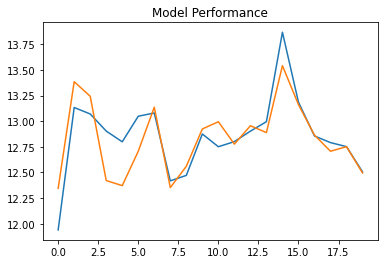

In [82]:
#import matplotlib.pyplot as plt

#plt.title('Model Performance')
#plt.plot(list(y_pred)[:20])
#plt.plot(list(y_test)[:20])

In [22]:
#predictions = np.ceil(predictions)

In [73]:
# get metrics
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.8498984194198249, 0.15232216670000195, 0.20557985116535857)

In [115]:
#import math
#print("Exemple de passage de la valeur logarithmique du $ à la valeur en base 10 du $ pour la première valeur prédite: {} -> {} $".format(predictions[0], math.exp(predictions[0])))

Exemple de passage de la valeur logarithmique du $ à la valeur en base 10 du $ pour la première valeur prédite: 12.22595492138499 -> 204016.248953056 $


MAE: 0.15232216670000195
MSE: 0.04226307520517098
RMSE: 0.20557985116535857


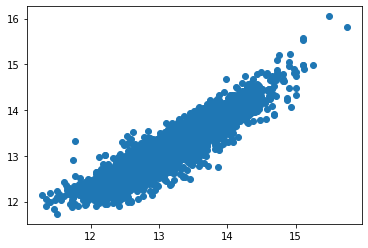

In [87]:
import matplotlib.pyplot as plt
predictions = model.predict(X_test)  
plt.scatter(y_test,predictions)


from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))